In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import os
from pandas.core.frame import DataFrame
import plotly.express as px
import datetime
import plotly.graph_objects as go

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from math import sqrt
import gc


In [4]:
result_dir = "result/"

def read_and_process_file_csv(name: str):
    return pd.read_csv(result_dir + "y_" + name + ".csv", index_col='index').rename(columns={'0': name})


In [6]:
actual = read_and_process_file_csv('actual')
pred_dtree = read_and_process_file_csv('pred_dtree')
pred_lgbm = read_and_process_file_csv('pred_lgbm')
pred_random_forest = read_and_process_file_csv('pred_random_forest')
pred_svm = read_and_process_file_csv('pred_svm')
pred_xgboost = read_and_process_file_csv('pred_xgboost')


In [14]:
frames = [actual, pred_dtree, pred_lgbm,
          pred_random_forest, pred_svm, pred_xgboost]
result = pd.concat(frames, axis=1)

result = result.dropna()


In [15]:
title = 'AQI Forecasting Performance'

labels = result.columns.values

x_data = result.index.values

fig = go.Figure()


fig.add_trace(go.Scatter(x=x_data, y=result['actual'], mode='lines',
                         name='actual',
                         connectgaps=True,
                         ))

for col_name in result.loc[:, result.columns != 'actual'].columns:
    fig.add_trace(go.Scatter(x=x_data, y=result[col_name], mode='lines',
                             name=col_name,
                             connectgaps=True,
                             ))

fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=False,
        showticklabels=True,
        linecolor='rgb(204, 204, 204)',
        linewidth=2,
        ticks='outside',
        tickfont=dict(
            family='Arial',
            size=12,
            color='rgb(82, 82, 82)',
        ),
    ),
    yaxis=dict(
        showgrid=False,
        zeroline=False,
        showline=True,
        showticklabels=True,
    ),
    autosize=True,
    margin=dict(
        autoexpand=True,
        l=80,
        r=20,
        t=80,
    ),
    showlegend=True,
    plot_bgcolor='white'
)

annotations = []

annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                        xanchor='left', yanchor='bottom',
                        text='Proposed AQI Forecasting Performance',
                        font=dict(family='Arial',
                                  size=26,
                                  color='rgb(37,37,37)'),
                        showarrow=False))

fig.update_layout(annotations=annotations)


MODEL :actual
 R^2= 1.000
 MSE= 0.000
 MAE= 0.000

MODEL :pred_dtree
 R^2= 0.931
 MSE= 15.863
 MAE= 2.822

MODEL :pred_lgbm
 R^2= 0.953
 MSE= 10.764
 MAE= 2.348

MODEL :pred_random_forest
 R^2= 0.963
 MSE= 8.599
 MAE= 2.075

MODEL :pred_svm
 R^2= 0.973
 MSE= 6.166
 MAE= 1.641

MODEL :pred_xgboost
 R^2= 0.954
 MSE= 10.619
 MAE= 2.430



10

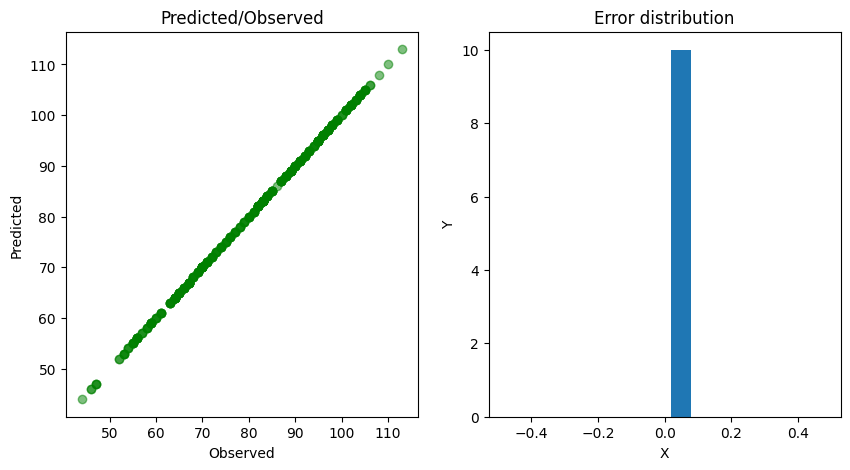

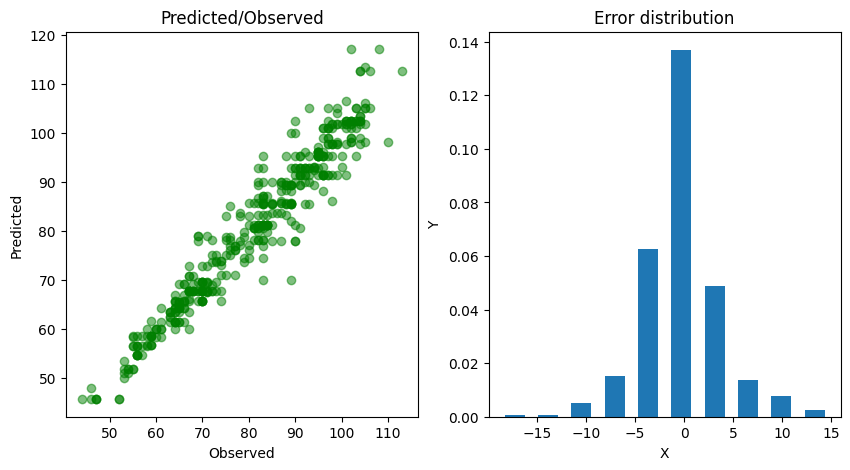

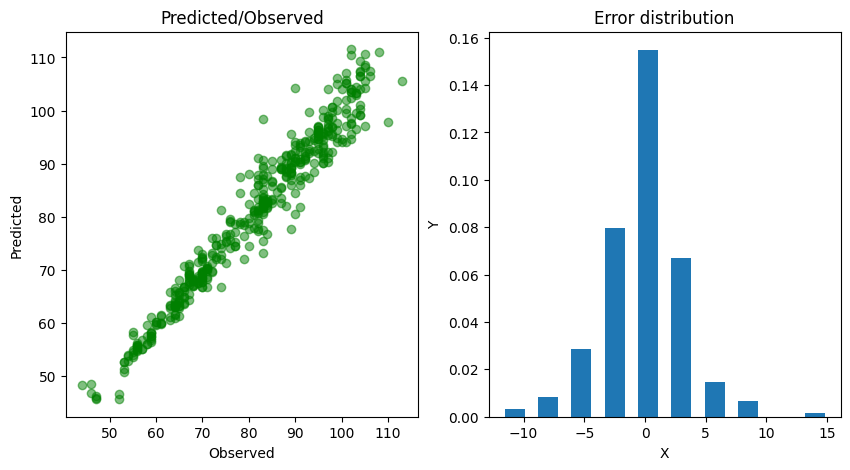

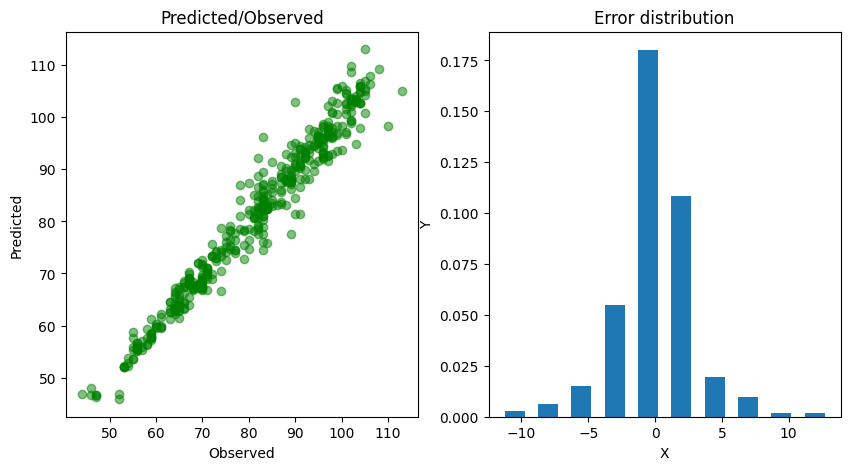

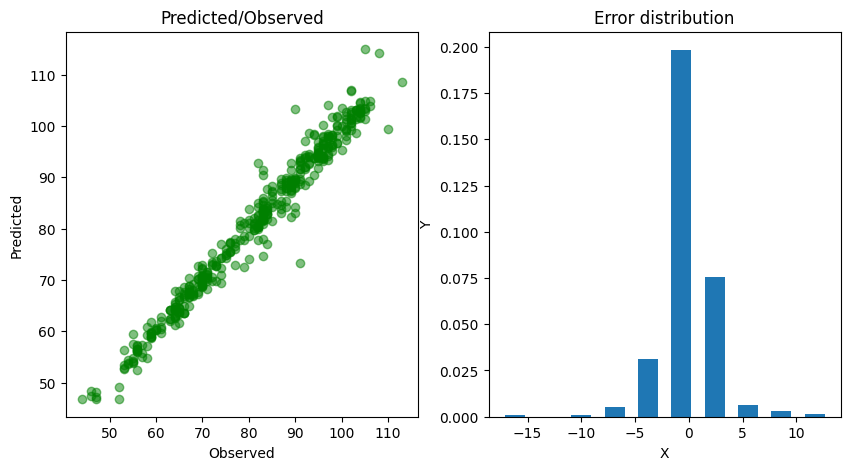

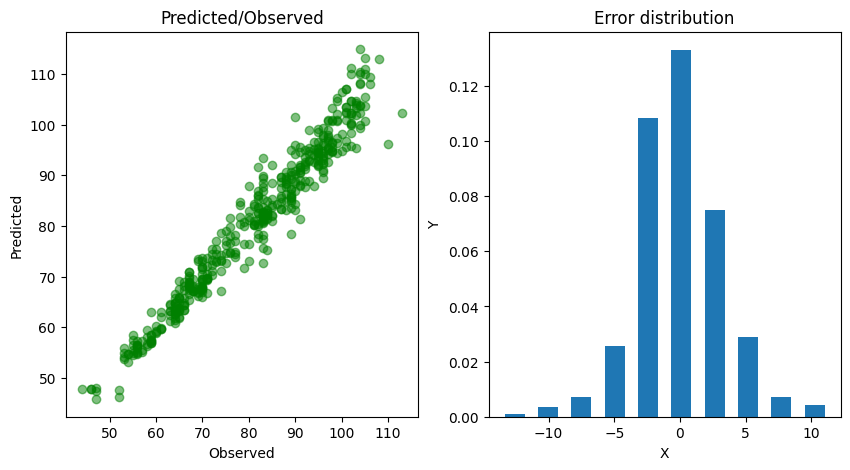

In [16]:
for col_name in result.columns:
    y_test = result['actual']
    y_pred = result[col_name]
    print('MODEL :%s\n' % col_name,
          'R^2= %.3f\n' % r2_score(y_test, y_pred),
          'MSE= %.3f\n' % mean_squared_error(y_test, y_pred),
          'MAE= %.3f\n' % mean_absolute_error(y_test, y_pred))
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    axs[0].set_title("Predicted/Observed")
    axs[0].set_xlabel("Observed")
    axs[0].set_ylabel("Predicted")
    axs[0].scatter(x=y_test, y=y_pred, color="g", marker="o", alpha=0.5)

    axs[1].set_title("Error distribution")
    axs[1].set_xlabel("X")
    axs[1].set_ylabel("Y")
    axs[1].hist(y_pred-y_test, bins=10, rwidth=0.6, density=True)

gc.collect()
